In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
col = ['Vgb','Id']
dfn = pd.read_csv('./csv/nmos.csv', sep='\s+', names=col)
dfp = pd.read_csv('./csv/pmos.csv', sep='\s+', names=col)

Vgbn = dfn['Vgb'].to_numpy()
Idn = dfn['Id'].to_numpy()
Vgbp = dfp['Vgb'].to_numpy()
Idp = dfp['Id'].to_numpy()

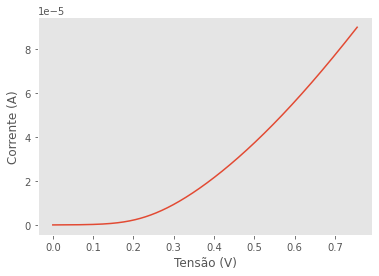

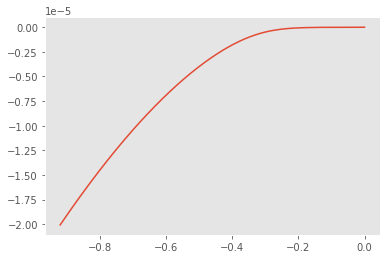

In [3]:
fig1 = plt.figure()
plt.plot(Vgbn,Idn)
plt.xlabel("Tensão (V)")
plt.ylabel("Corrente (A)")
plt.grid()
fig2 = plt.figure()
plt.plot(Vgbp,Idp)
plt.grid()

0.013111134915523638 -0.0003901689080467272
R2 = 0.9997502850250705


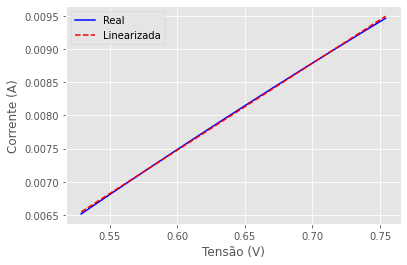

In [4]:
sqIdn = Idn**0.5
sqIdn = sqIdn[int(0.7*len(sqIdn)):-1]
sqVgbn = Vgbn[int(0.7*len(Vgbn)):-1]
fig3 = plt.figure()
plt.plot(sqVgbn,sqIdn, '-b')
plt.xlabel("Tensão (V)")
plt.ylabel("Corrente (A)")
plt.grid()

linFitn = np.polyfit(sqVgbn,sqIdn,1)
fitIdn = linFitn[1] + sqVgbn*linFitn[0]
print(linFitn[0], linFitn[1])
plt.plot(sqVgbn,fitIdn, '--r')
plt.legend(['Real','Linearizada'])
plt.grid()

from sklearn.metrics import r2_score

print(f'R2 = {r2_score(sqIdn,fitIdn)}')

fig3.savefig('./images/imagem1.png', format='png', dpi=1200)

-0.005742781198660899 -0.00079157961989334
R2 = 0.9998647339871889


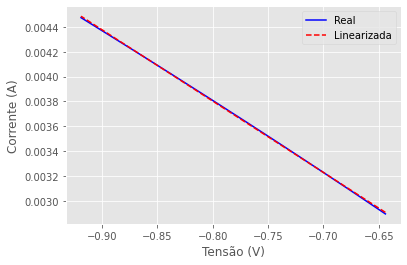

In [5]:
sqIdp = (-1*Idp)**0.5
sqIdp = sqIdp[int(0.7*len(sqIdp)):-1]
sqVgbp = Vgbp[int(0.7*len(Vgbp)):-1]
fig4 = plt.figure()
plt.plot(sqVgbp,sqIdp, '-b')
plt.xlabel("Tensão (V)")
plt.ylabel("Corrente (A)")
plt.grid()

linFitp = np.polyfit(sqVgbp,sqIdp,1)
fitIdp = linFitp[1] + sqVgbp*linFitp[0]
print(linFitp[0], linFitp[1])
plt.plot(sqVgbp,fitIdp, '--r')
plt.legend(['Real','Linearizada'])
plt.grid()

from sklearn.metrics import r2_score

print(f'R2 = {r2_score(sqIdp,fitIdp)}')
fig4.savefig('./images/imagem2.png', format='png', dpi=1200)

In [6]:
Kqn = linFitn[0]**2
Kqp = linFitp[0]**2
Vton = -1 * linFitn[1] / linFitn[0]
Vtop = -1 * linFitp[1] / linFitp[0]

linIdn = Kqn*(Vgbn-Vton)**2
linIdp = -1*Kqp*(Vgbp-Vtop)**2

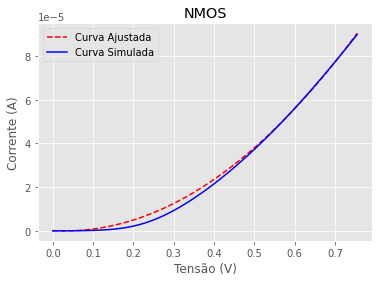

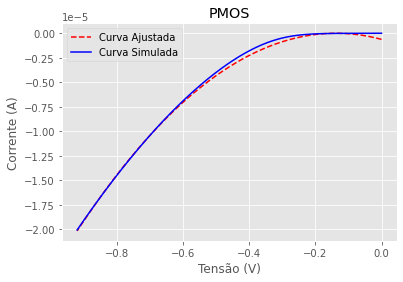

In [7]:
fig5 = plt.figure()
plt.plot(Vgbn,linIdn, '--r', linewidth = 1.5)
plt.plot(Vgbn,Idn, '-b', linewidth = 1.5)
plt.legend(['Curva Ajustada', 'Curva Simulada'])
plt.title('NMOS')
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (A)')
fig5.savefig('modelo1.png', format='png', dpi=1200)

fig6 = plt.figure()
plt.plot(Vgbp, linIdp, '--r', linewidth = 1.5)
plt.plot(Vgbp,Idp, '-b', linewidth = 1.5)
plt.legend(['Curva Ajustada', 'Curva Simulada'])
plt.title('PMOS')
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (A)')
fig6.savefig('modelo2.png', format='png', dpi=1200)